# **Hands-on Activity 10.1 Data Analysis using Python**

Marquez, Keith Leigh Zhen R.

Instruction

1. Gather a dataset regarding your identified problem for the ASEAN Data Science Explorer. Make sure that the dataset includes multiple variables.
2. Load the dataset into pandas dataframe.
3. Prepare the data by applying appropriate data preprocessing techniques.
4. Analyze the data using descriptive analysis.
4. Perform correlation analysis.
5. Interpret the results based on the descriptive and correlation analysis.
6. Submit the PDF file.

#6  Clean Water And Sanitation

# **Indian water quality data**

In [1]:
import numpy as np
import pandas as pd

water_qual = pd.read_csv('/content/water_dataX.csv', encoding='latin1')
water_qual

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NAN,7.9,738,7.2,2.7,0.518,0.518,202,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29,7.5,585,6.3,2.6,0.155,0.155,315,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28,7.6,98,6.2,1.2,NAN,NAN,570,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28,7.7,91,6.5,1.3,NAN,NAN,562,2003


In [2]:
water_qual.dtypes # datatypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

# Change the 'object' to numeric

In [3]:
def convert_numeric(water_qual):
    num_columns = water_qual.shape[1]  # Number of columns in the DataFrame
    # Iterate over columns starting from index 3
    for index in range(3, num_columns):
        column_name = water_qual.iloc[:, index].name  # Get the name of the current column
        # Convert values in the current column to numeric, coercing errors
        water_qual[column_name] = pd.to_numeric(water_qual[column_name], errors="coerce")
    return water_qual

water_qual = convert_numeric(water_qual)
# Print the data types of the DataFrame after conversion
water_qual.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)          float64
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [4]:
water_qual.describe() # descriptive statistics

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
count,1899.000000,1960.000000,1983.000000,1966.000000,1948.000000,1766.000000,1.675000e+03,1.859000e+03,1991.000000
mean,26.209814,6.392637,112.090674,1786.466394,6.940049,1.623079,3.625294e+05,5.336872e+05,2010.038172
std,3.366388,1.332938,1878.930716,5552.276223,29.400026,4.090481,8.764767e+06,1.423428e+07,3.057333
min,10.000000,0.000000,0.000000,0.400000,0.100000,0.000000,0.000000e+00,0.000000e+00,2003.000000
25%,24.750000,5.900000,6.900000,78.000000,1.200000,0.240000,2.600000e+01,1.060000e+02,2008.000000
50%,27.000000,6.700000,7.300000,183.000000,1.896500,0.516000,2.210000e+02,4.680000e+02,2011.000000
75%,28.400000,7.200000,7.700000,592.750000,3.600000,1.500000,9.965000e+02,1.919000e+03,2013.000000
max,35.000000,11.400000,67115.000000,65700.000000,534.500000,108.700000,2.725216e+08,5.110909e+08,2014.000000


# Check for missing values

In [5]:
missing_values = water_qual.isnull().sum()
print("MISSING VALUES:")
missing_values

MISSING VALUES:


STATION CODE                          0
LOCATIONS                             0
STATE                                 0
Temp                                 92
D.O. (mg/l)                          31
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
B.O.D. (mg/l)                        43
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)          316
TOTAL COLIFORM (MPN/100ml)Mean      132
year                                  0
dtype: int64

# Check for duplicate rows

In [6]:
duplicates = water_qual.duplicated().sum()
print("DUPLICATE ROWS:")
duplicates

DUPLICATE ROWS:


1

# Remove duplicate rows

In [7]:
water_qual.drop_duplicates(inplace=True)

# # Ensure proper data type conversion (datetime)

In [8]:
water_qual['year'] = pd.to_datetime(water_qual['year'], format='%Y')
water_qual['year']

0      2014-01-01
1      2014-01-01
2      2014-01-01
3      2014-01-01
4      2014-01-01
          ...    
1986   2003-01-01
1987   2003-01-01
1988   2003-01-01
1989   2003-01-01
1990   2003-01-01
Name: year, Length: 1990, dtype: datetime64[ns]

# Check pH values are within the range of 0 to 14

In [9]:
invalid_pH_values = water_qual[(water_qual['PH'] < 0) | (water_qual['PH'] > 14)]
invalid_pH_values

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
1901,1448,"NAGAVALLI AT THOTAPALLI REGULATOR, AP",NAN,30.0,7.8,239.0,6.2,1.7,2.188,2.188,10720.0,2004-01-01
1902,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,NAN,29.0,7.5,442.0,6.7,3.4,NaN,NaN,132.0,2004-01-01
1903,1475,ZUARI AT PANCHAWADI,NAN,29.0,7.0,430.0,6.4,2.4,NaN,NaN,175.0,2003-01-01
1904,1476,"MANDOVI AT TONCA, MARCELA, GOA",NAN,29.0,7.2,216.0,7.1,1.8,NaN,NaN,167.0,2003-01-01
1905,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",NAN,29.0,7.9,352.0,4.5,4.2,NaN,NaN,158.0,2003-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NaN,7.9,738.0,7.2,2.7,0.518,0.518,202.0,2003-01-01
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.0,7.5,585.0,6.3,2.6,0.155,0.155,315.0,2003-01-01
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.0,7.6,98.0,6.2,1.2,NaN,NaN,570.0,2003-01-01
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.0,7.7,91.0,6.5,1.3,NaN,NaN,562.0,2003-01-01


# New column indicating acidity or base based on the pH value

In [10]:
# Add a new column indicating acidity or base based on pH value
water_qual['pH_category'] = np.where(water_qual['PH'] < 7, 'Acidic', 'Basic')
water_qual.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year,pH_category
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.1,11.0,27.0,2014-01-01,Basic
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.2,4953.0,8391.0,2014-01-01,Basic
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.1,3243.0,5330.0,2014-01-01,Acidic
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.5,5382.0,8443.0,2014-01-01,Acidic
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.4,3428.0,5500.0,2014-01-01,Basic


# Applying aggregation

In [11]:
# Define aggregation functions for different columns
aggregation_functions = { # Calculate mean of:
    'Temp': 'mean',
    'D.O. (mg/l)': 'mean',
    'PH': 'mean',
    'CONDUCTIVITY (µmhos/cm)': 'mean',
    'B.O.D. (mg/l)': 'mean',
    'NITRATENAN N+ NITRITENANN (mg/l)': 'mean',
    'FECAL COLIFORM (MPN/100ml)': 'mean',
    'TOTAL COLIFORM (MPN/100ml)Mean': 'mean'
}

# Aggregate the data using the defined aggregation functions
result = water_qual.agg(aggregation_functions)
result

Temp                                    26.209814
D.O. (mg/l)                              6.392637
PH                                     112.090674
CONDUCTIVITY (µmhos/cm)               1786.466394
B.O.D. (mg/l)                            6.940049
NITRATENAN N+ NITRITENANN (mg/l)         1.623079
FECAL COLIFORM (MPN/100ml)          362529.364718
TOTAL COLIFORM (MPN/100ml)Mean      533687.165680
dtype: float64

In [12]:
# Define aggregation functions for different columns
aggregation_functions = { # Calculate median of:
    'Temp': 'median',
    'D.O. (mg/l)': 'median',
    'PH': 'median',
    'CONDUCTIVITY (µmhos/cm)': 'median',
    'B.O.D. (mg/l)': 'median',
    'NITRATENAN N+ NITRITENANN (mg/l)': 'median',
    'FECAL COLIFORM (MPN/100ml)': 'median',
    'TOTAL COLIFORM (MPN/100ml)Mean': 'median'
}

# Aggregate the data using the defined aggregation functions
result1 = water_qual.agg(aggregation_functions)
result1

Temp                                 27.0000
D.O. (mg/l)                           6.7000
PH                                    7.3000
CONDUCTIVITY (µmhos/cm)             183.0000
B.O.D. (mg/l)                         1.8965
NITRATENAN N+ NITRITENANN (mg/l)      0.5160
FECAL COLIFORM (MPN/100ml)          221.0000
TOTAL COLIFORM (MPN/100ml)Mean      468.0000
dtype: float64

# Save New CSV file

In [13]:
# Save cleaned data to a new CSV file
water_qual.to_csv('/content/cleaned_water_data.csv', index=False)

# Correlation matrix

In [14]:
# Calculate correlation matrix
correlation_matrix = water_qual.corr()
correlation_matrix

<ipython-input-14-cf71e4ed16ce>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = water_qual.corr()


,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
Temp,1.000000,0.026269,0.017262,0.145811,-0.049795,-0.228859,0.011237,0.009165
D.O. (mg/l),0.026269,1.000000,0.034825,-0.167928,-0.281415,-0.210520,-0.162871,-0.148194
PH,0.017262,0.034825,1.000000,-0.017917,0.041545,-0.012578,-0.002258,-0.002123
CONDUCTIVITY (µmhos/cm),0.145811,-0.167928,-0.017917,1.000000,0.108166,0.056999,0.003349,0.003877
B.O.D. (mg/l),-0.049795,-0.281415,0.041545,0.108166,1.000000,0.138915,0.234261,0.190468
NITRATENAN N+ NITRITENANN (mg/l),-0.228859,-0.210520,-0.012578,0.056999,0.138915,1.000000,-0.000687,-0.000988
FECAL COLIFORM (MPN/100ml),0.011237,-0.162871,-0.002258,0.003349,0.234261,-0.000687,1.000000,0.985428
TOTAL COLIFORM (MPN/100ml)Mean,0.009165,-0.148194,-0.002123,0.003877,0.190468,-0.000988,0.985428,1.000000


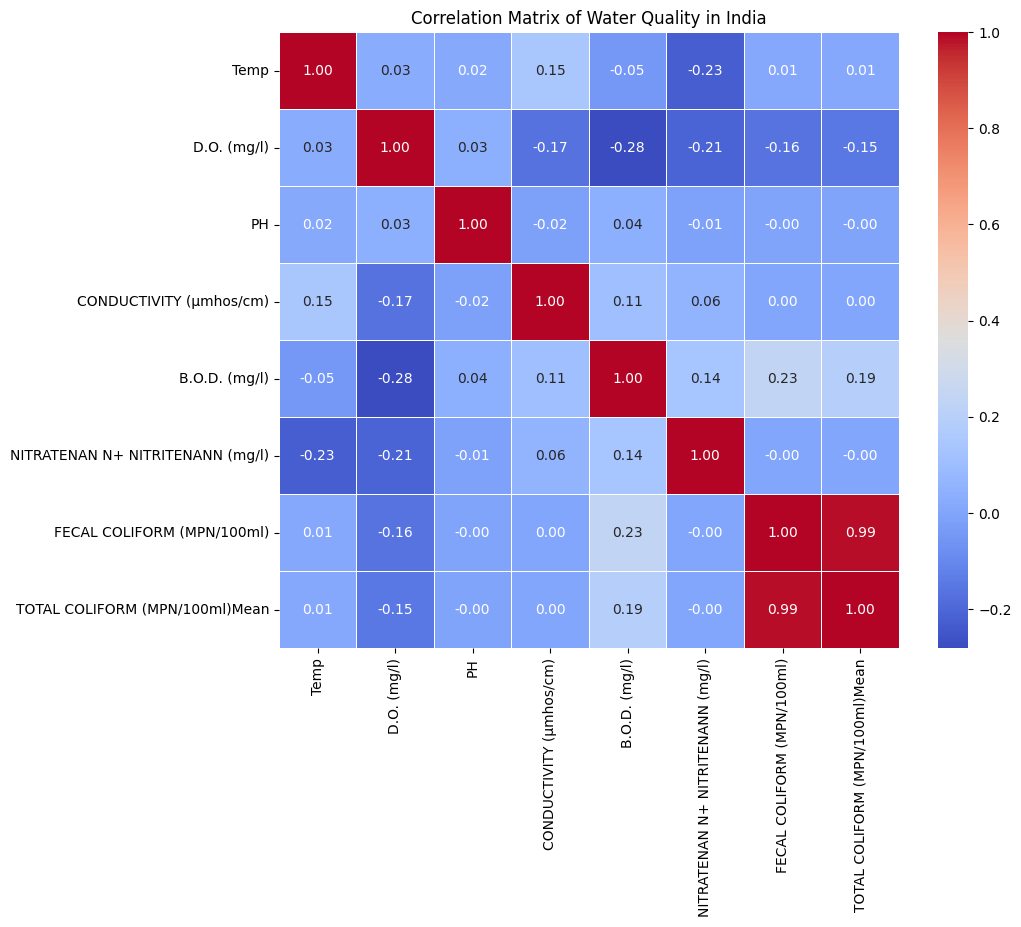

In [15]:
# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Water Quality in India')
plt.show()